### 1. Persamaan Laplace
\begin{eqnarray}
\nabla^2u=0 \tag{1}
\end{eqnarray}
Persamaan ini merupakan bentuk persamaan diferensial parsial

#### 1.2 Persamaan Laplace 1D
\begin{eqnarray}
\frac{d^2u}{dx^2}=0 \tag{2}
\end{eqnarray}
#### Contoh kasus
Sebuah batang logam dengan panjang $L$, suhu ujung pertama $100^0$ C sementara ujung lainnya $0^0$, bagaimanakah sebaran suhu di sepanjang batang tersebut

#### Finite Difference
Berdasarkan deret Maclaurin
\begin{eqnarray}
f(x+h)= f(x)+hf'(x)+\frac{h^2}{2!}f^"(x)+\frac{h^3}{3!}f'^"(x)+\cdots \\ 
f(x-h)= f(x)-hf'(x)+\frac{h^2}{2!}f^"(x)-\frac{h^3}{3!}f'^"(x)+\cdots
\end{eqnarray}
Apabila kedua disubtitusi dan hanya diambil sampai suku turunan kedua akan diperoleh
\begin{eqnarray}
 f^"(x)=\frac{f(x+h)+f(x-h)-2f(x)}{h^2}
\end{eqnarray}
$f(x)$ adalah nilai fungsi pada titik $x$, akan dituliskan sebagai $f_n$, $f(x+h)$ ditulis $f_{n+1}$ dan $f(x-h)$ ditulis $f_{n-1}$, sehingga
\begin{eqnarray}
f^"_n=\frac{f_{n+1}+f_{n-1}-2f_n}{h^2}.
\end{eqnarray}
Penguraian semacam ini biasa disebut dengan metode central difference. Berikutnya, persamaan (2) dapat diuraikan menurut:
\begin{eqnarray}
u_{n+1}+u_{n-1}-2u_n=0. \tag{3}
\end{eqnarray}

#### Metode Eksplisit
Berdasarkan persamaan (3) yang merupakan central difference tentu faktor yang diselesaikan adalah $u_n$, sehingga:
\begin{eqnarray}
u_n=\frac{1}{2}(u_{n+1}+u_{n-1}) \tag{4}
\end{eqnarray}

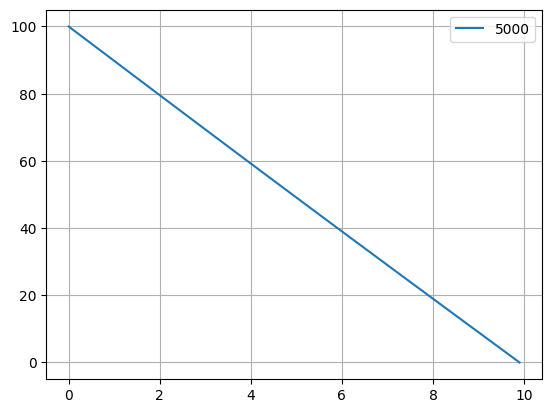

In [8]:
from numpy import *
from matplotlib.pyplot import *

L =10
h = 0.1
step = 5000
n = round(L/h)
x = arange(0,L,h)
T =zeros((n))
T[0]=100
for j in range(step):
    for i in range(1,n-1):
        T[i]=0.5*(T[i+1]+T[i-1])
plot(x,T, label=step)
grid("on")
legend(loc="best")

#### Ilustrasi sederhana
Dua buah persamaan linier
\begin{eqnarray}
2x+y = 5\\
x-y=1
\end{eqnarray}
dapat dituliskan ke dalam bentuk matriks menurut
\begin{eqnarray}
\left[ \begin{matrix}
2&1\\
1&-1
\end{matrix}
\right]
\left[
\begin{matrix}
x\\
y
\end{matrix}
\right]&=&\left[
\begin{matrix}
5\\
1
\end{matrix}
\right]\\
M A&=&B
\end{eqnarray}

In [13]:
from numpy import *
M=array([[2,1],[1,-1]])
B=array([5,1])
c = linalg.solve(M,B)
c

array([2., 1.])

#### Metode Implisit
Persamaan (3) dapat diuraikan lagi lebih detail untuk beberapa nilai $n$, dengan $n=1,2,3,\cdots$
\begin{eqnarray}
u_{n-1}-2u_n+u_{n+1}=0
\end{eqnarray}
\begin{eqnarray}
u_0-2u_1+u_2=0\\
u_1-2u_2+u_3=0\\
u_2-2u_3+u_4=0\\
\vdots\\
u_{n-1}-2u_n+u_{n+1}=0
\end{eqnarray}
Permasalahan ini dapat dianggap sebagai sistem persamaan linier yang dapat ditulis
\begin{eqnarray}
\left[ \begin{matrix}
-2&1&0&0&\cdots&0\\
1&-2&1&0&\cdots&0\\
0&1&-2&1&\cdots&0\\
0&0&1&-2&\cdots&0\\
\vdots&\vdots&\vdots&\vdots&\ddots&0\\
0&0&0&0&1&-2
\end{matrix}
\right]
\left[
\begin{matrix}
u_1\\
u_2\\
u_3\\
u_4\\
\vdots\\
u_n
\end{matrix}
\right]=\left[
\begin{matrix}
u_0\\
0\\
0\\
0\\
\vdots\\
u_{n+1}
\end{matrix}
\right]
\end{eqnarray}

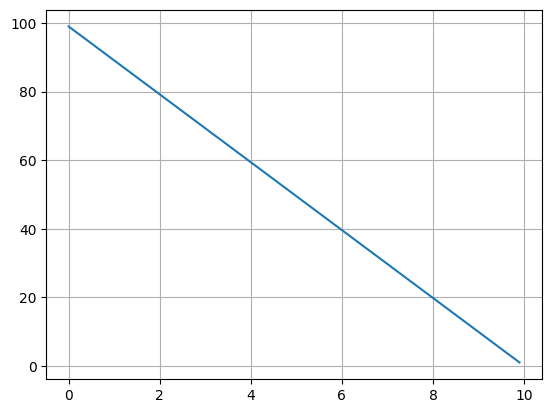

In [15]:
from numpy import *
from matplotlib.pyplot import*

L =10
h = 0.1
n = round(L/h)
x = arange(0,L,h)
B =zeros((n))
B[0]=-100
M=zeros((n,n))
for i in range(1,n):
    M[i,i]=-2
    M[i,i-1]=1
    M[i-1,i]=1
M[0,0]=-2
A= linalg.solve(M,B)
plot(x,A)
grid("on")

#### 1.2 Persamaan Laplace 2D

\begin{eqnarray}
\frac{\partial ^2 u}{\partial x^2}+\frac{\partial ^2 u}{\partial y^2}=0\tag{1.2.1}
\end{eqnarray}

Mengingat
\begin{eqnarray}
f^"_n=\frac{f_{n+1}+f_{n-1}-2f_n}{h^2}.
\end{eqnarray}

persamaan (1.2.1) dapat diuraikan menjadi
\begin{eqnarray}
\frac{u_{i+1,j}+u_{i-1,j}-2u_{i,j}}{h^2_x}+\frac{u_{i,j+1}+u_{i,j-1}-2u_{i,j}}{h^2_y}=0.\tag{1.2.2}
\end{eqnarray}

##### Contoh Kasus

sebuah bidang pada tepiannya masing-masing $100^0$ pada tepi bawah dan $0^0$ pada ketiga tepi lainnya. Berapakah sebaran suhu pada bidang tersebut.

Faktor yang dicari pada persamaan (1.2.2) adalah $u_{i,j}$ sehingga
\begin{eqnarray}
u_{i,j} =\frac{1}{2(h_x^2+h_y^2)}\left[ h_y^2(u_{i+1,j}+u_{i-1,j})+h_x^2(u_{i,j+1}+u_{i,j-1})\right]
\end{eqnarray}

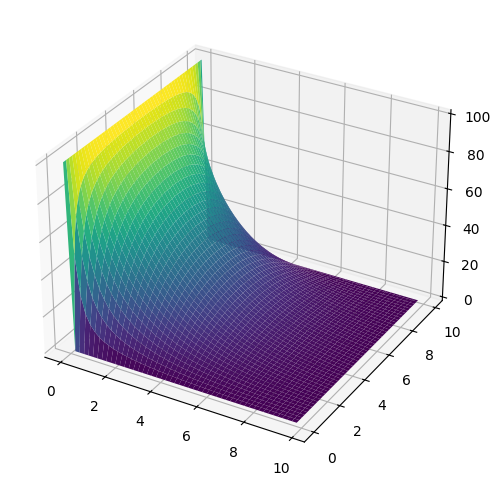

In [13]:
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D

Lx, Ly =10,10
hx,hy = 0.2,0.1
step = 1000
nx,ny = round(Lx/hx), round(Ly/hy)
x = arange(0,Lx,hx)
y = arange(0,Ly,hy)
T =zeros((nx,ny))
T[0,:]=100
for k in range(step):
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[i,j]=1/(2*(hx**2+hy**2))*(hy**2*(T[i+1,j]+T[i-1,j])+hx**2*(T[i,j+1]+T[i,j-1]))

X,Y =meshgrid(x,y)
fig = figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T.T, cmap='viridis');